In [58]:
import numpy as np
import matplotlib.pyplot as plt
from data import FaceExpressionDataset
from model import FaceExpressionPCA
from translator import EmotionTranslator

In [59]:
train_dataset = FaceExpressionDataset(
    data_dir="../../datasets/data/face_expression",
    split="train",
    image_size=(48, 48),
    grayscale=True,
)
val_dataset = FaceExpressionDataset(
    data_dir="../../datasets/data/face_expression",
    split="validation",
    image_size=(48, 48),
    grayscale=True,
)
train_data = train_dataset.load()
val_data = val_dataset.load()

data = train_data
data.X.shape, data.y.shape, data.label_names

((12102, 2304), (12102,), ['happy', 'sad'])

In [60]:
label_to_index = {name: idx for idx, name in enumerate(train_data.label_names)}
happy_idx = label_to_index["happy"]
sad_idx = label_to_index["sad"]

X = np.vstack([train_data.X, val_data.X])
y = np.concatenate([train_data.y, val_data.y])

mask = (y == happy_idx) | (y == sad_idx)
X = X[mask]
y = y[mask]

X.shape, np.unique(y)

((15066, 2304), array([0, 1]))

In [61]:
model = FaceExpressionPCA(n_components=250, random_state=42)
model.fit(X)

translator = EmotionTranslator(model, train_data.label_names)
translator.fit(X, y)

In [62]:
rng = np.random.default_rng()

happy_pool = X[y == happy_idx]
sad_pool = X[y == sad_idx]

happy_sample = happy_pool[rng.integers(0, len(happy_pool))]
sad_sample = sad_pool[rng.integers(0, len(sad_pool))]

happy_to_sad = translator.translate(
    happy_sample,
    "happy",
    "sad",
    image_shape=data.image_shape,
    alpha=2.6,
)
sad_to_happy = translator.translate(
    sad_sample,
    "sad",
    "happy",
    image_shape=data.image_shape,
    alpha=2.6,
)

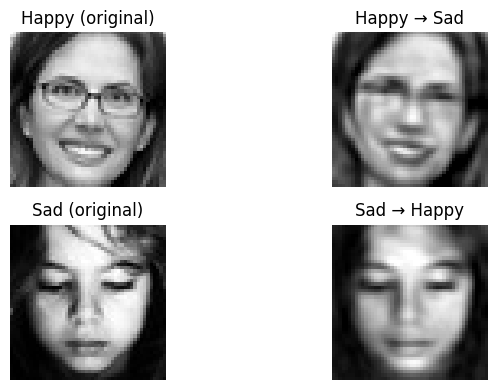

In [63]:
def show(img, title):
    plt.imshow(img, cmap="gray")
    plt.title(title)
    plt.axis("off")

plt.figure(figsize=(8, 4))

plt.subplot(2, 2, 1)
show(happy_sample.reshape(data.image_shape), "Happy (original)")

plt.subplot(2, 2, 2)
show(happy_to_sad, "Happy → Sad")

plt.subplot(2, 2, 3)
show(sad_sample.reshape(data.image_shape), "Sad (original)")

plt.subplot(2, 2, 4)
show(sad_to_happy, "Sad → Happy")

plt.tight_layout()